In [ ]:
#This code uses the Quasi-Universal Relation, Binary Love with Nuclear EOSs

In [1]:
import function as fct

from os import listdir

import numpy as np
from numpy import linspace, loadtxt, array, zeros, nan
from scipy.optimize import curve_fit
from scipy import interpolate
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

********************	 Fit of the Binary Love relation	********************
Read TOV tables in the set nuclear
	 EoS DDME2_US30.tab
	 EoS NL3_NJL_VI+PI_WB_gv_025gs.tab
	 EoS SLY9.tab
	 EoS TM2wr_noY.tab
	 EoS BSk23.tab
	 EoS TM2_noY.tab
	 EoS BSk24.tab
	 EoS NL3_NJL_VPVIPI_WOB_050gs.tab
	 EoS NL3_NJL_VPVIPI_WB_025gs.tab
	 EoS TM1_US30.tab
	 EoS TM1wr_noY.tab
	 EoS NL3_NJL_VI+PI_WB_gv_050gs.tab
	 EoS GM1_noY.tab
	 EoS NL3_NJL_V+P_WB_gv_075gs.tab
	 EoS DD2_NJL_B0.tab
	 EoS SkI6.tab
	 EoS BSk25.tab
	 EoS NL3wr_US30.tab
	 EoS SK255.tab
	 EoS BSk22.tab
	 EoS DD2_NJL_B15.tab
	 EoS NL3_NJL_V+P_WOB_gv_025gs.tab
	 EoS SLY230a.tab
	 EoS FSU2_noY.tab
	 EoS TM1wr_US30.tab
	 EoS NL3_NJL_V+P_WOB_gv_050gs.tab
	 EoS SKb.tab
	 EoS FSU2R_noY.tab
	 EoS DDME2_noY.tab
	 EoS NL3_NJL_VPVIPI_WOB_075gs.tab
	 EoS DDHd_noY.tab
	 EoS NL3_NJL_VI+PI_WB_gv_075gs.tab
	 EoS FSU2R_US30.tab
	 EoS SK272.tab
	 EoS SKa.tab
	 EoS H4_noY.tab
	 EoS NL3_US30.tab
	 EoS TM1_noY.tab
	 EoS SkI2.tab
	 EoS SkI5.tab
	 EoS NL3_NJL_VI+P

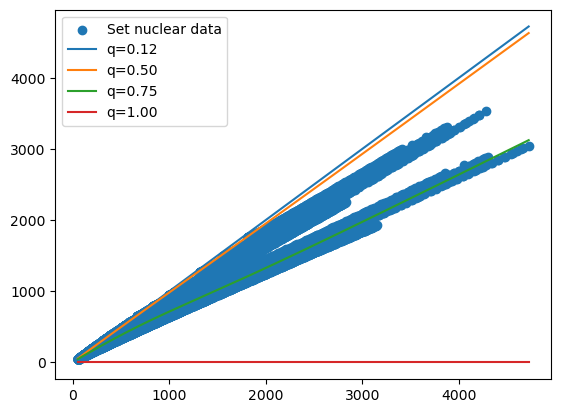

In [26]:
print("*"*20+"\t Fit of the Binary Love relation\t"+"*"*20)
# ----------------------------------- Operate the fit of the Binary Love relation ------------------------------- #
eos_directory = "sets_eos/"
eos_sets = listdir(eos_directory)
q_grid = [0.65, 0.75]#linspace(0.125,1.0,50)

for sets in eos_sets:
    set_dir = eos_directory+sets+"/"
    # Reading the TOV files for the set of EoSs
    print("Read TOV tables in the set %s"%sets)
    if "tov_tables" in listdir(set_dir):
        tov_dir = set_dir+"tov_tables/"
        tov_list = listdir(tov_dir)
        
        # tov_list = tov_list[:2]
        
        ipynb_checkpoints = ".ipynb_checkpoints" 
        while(ipynb_checkpoints in tov_list):
            tov_list.remove(ipynb_checkpoints)
        
        all_q = [] ; all_ls = [] ; all_la = []
        for i in range(len(tov_list)):
            print("\t EoS %s"%(tov_list[i]))
            tov_file = tov_dir + tov_list[i]
            mass, lamba = fct.read_tov(tov_file, 0.5, None, "camk")
            for q in q_grid:
                lamba_sym, lamba_antisym = fct.extract_ls_la(mass, lamba, q)
                for i in range(len(lamba_sym)):
                    all_q.append(q)
                    all_ls.append(lamba_sym[i])
                    all_la.append(lamba_antisym[i])
    file_param = set_dir+"fit_parameters_%s.dat"%sets
    if "fit_parameters_%s.dat"%sets not in listdir(set_dir):
        print("Starting to operate the fit ...")
        param, covar = curve_fit(fct.lals_fit, (all_ls,all_q), all_la, method="lm")
        print("\t ... done !")

        print("Writing the fit paramters in file %s."%(file_param))
        f = open(file_param, "w")
        f.write("# Binary Love fit parameters\n")
        for par in param:
            f.write("%.6e \n"%par)
        f.close()
    else:
        print("Parameter file already exists: %s"%file_param)
    # Read the parameter file
    par = loadtxt(file_param, usecols = (0), unpack=True)
    print("Parameters : ", par)
    print("\n Prepare the figure for the fit")
    # Plot the original TOV data
    plt.scatter(all_ls, all_la, label="Set %s data"%sets)
    # Plot the fit at various values of the mass ratio
    list_qs = [0.125,0.5,0.75,1.0]
    lamba_grid = linspace(min(all_ls), max(all_ls), 500)
    for i in range(len(list_qs)):
        fit_lamba_antisym = fct.lals_fit((lamba_grid, list_qs[i]),
                                        par[0],                        #nn
                                        par[1], par[2], par[3],        #b1...
                                        par[4], par[5], par[6],        #b2...
                                        par[7], par[8], par[9],        #b3...
                                        par[10], par[11], par[12],     #c1...
                                        par[13], par[14], par[15],     #c2...
                                        par[16], par[17], par[18]      #c3...
                                        )
        plt.plot(lamba_grid, fit_lamba_antisym, label = "q=%.2f"%list_qs[i])
    plt.legend()
    plt.show()

In [3]:
print("*"*20+"\t Gather and plot the error for each point of the Set\t"+"*"*20)
# ----------------------------------- Operate the fit of the Binary Love relation ------------------------------- #
eos_directory = "sets_eos/"
eos_sets = listdir(eos_directory)

npts_ls = 500
npts_q = 500
lamba_grid = linspace(10, 5000, npts_ls)
# Two grid points 
q_grid = [0.65, 0.75] 

for sets in eos_sets:
  if sets == "nuclear":
    set_dir = eos_directory+sets+"/"
    # Read the parameter file
    file_param = set_dir+"fit_parameters_%s.dat"%sets
    print("Parameter of the fit file %s"%file_param)
    par_fit = loadtxt(file_param, usecols = (0), unpack=True)
    print("Parameters of the fit: ", par_fit)

    set_dir = eos_directory+sets+"/"

    file_min_max = "data_min_max_LALS_%s.dat"%sets
    if file_min_max not in listdir():
        print("The file for min and max data values does not exist.")
        # Reading the TOV files for the set of EoSs
        print("Read TOV tables in the set %s"%sets)
        table_la_min = zeros((npts_q,npts_ls),dtype=float)
        table_la_min[:] = 1e30
        table_la_max = zeros((npts_q,npts_ls),dtype=float)
        if "tov_tables" in listdir(set_dir):
            tov_dir = set_dir+"tov_tables/"
            tov_list = listdir(tov_dir)            
            
            ##
            ipynb_checkpoints = ".ipynb_checkpoints" 
            while(ipynb_checkpoints in tov_list):
                tov_list.remove(ipynb_checkpoints)
            ##        

            for i in range(len(tov_list)):
                print("\t EoS %s"%(tov_list[i]))
                tov_file = tov_dir + tov_list[i]
                mass, lamba = fct.read_tov(tov_file, 0.5, None, "camk")
                for k in range(len(q_grid)):
                    lamba_sym, lamba_antisym = fct.extract_ls_la(mass, lamba, q_grid[k])
                    if len(lamba_sym) != 0 :
                        lsla = interpolate.interp1d(lamba_sym, lamba_antisym)
                        for j in range(len(lamba_grid)):
                            if lamba_grid[j] >= min(lamba_sym) and lamba_grid[j] <= max(lamba_sym):
                                table_la_min[k][j] = min(table_la_min[k][j], lsla(lamba_grid[j]))
                                table_la_max[k][j] = max(table_la_max[k][j], lsla(lamba_grid[j]))
        print("Print min and max data in the file %s"%file_min_max)
        f = open(file_min_max, "w")
        f.write("q \t Lambda_s \t Lambda_a min \t Lambda_a min\n")
        for k in range(len(q_grid)):
            for j in range(len(lamba_grid)):
                if table_la_min[k][j] != 1e30 and table_la_max[k][j] != 0:
                    f.write("%.6f \t %.6e \t %.6e \t %.6e\n"%(q_grid[k], lamba_grid[j], table_la_min[k][j], table_la_max[k][j]))
        f.close()
    else:
        print("The file for min and max data values exists: %s."%file_min_max)
        all_q_table, all_ls_table, all_la_min, all_la_max = loadtxt(file_min_max, usecols =(0,1,2,3), unpack=True,skiprows=1)

********************	 Gather and plot the error for each point of the Set	********************
Parameter of the fit file sets_eos/nuclear/fit_parameters_nuclear.dat
Parameters of the fit:  [   1.136388  -43.08852    54.86024   -18.13159   135.2377   -182.5228
   60.88841   -49.73405    47.09915    -6.485919  -41.87065    49.57624
  -13.94988   124.4521   -135.3649     23.78287   -27.33919   -54.68416
   73.6434  ]
The file for min and max data values exists: data_min_max_LALS_nuclear.dat.


********************	 Gather and plot the error for each point of the Set	********************
Parameter of the fit file sets_eos/nuclear/fit_parameters_nuclear.dat
Parameters of the fit:  [   1.136388  -43.08852    54.86024   -18.13159   135.2377   -182.5228
   60.88841   -49.73405    47.09915    -6.485919  -41.87065    49.57624
  -13.94988   124.4521   -135.3649     23.78287   -27.33919   -54.68416
   73.6434  ]
The file for min and max data values does not exist.
Read TOV tables in the set nuclear
Create a two dimensional table for 90 percentile
Doing fit for minimum value...
Doing fit for maximum value...
**********Param_min values:**********
[1.32402118, -42.8022509, 55.00946789, -19.94612875, 138.99695279, -184.42921881, 64.97193015, -50.36609873, 43.03910145, -8.79025148, -41.0416171, 47.70745751, -13.82700269, 126.3507737, -130.18833826, 20.37358684, -28.97010251, -54.30446461, 70.78194822]

**********Param_max values:**********
[1.25988254, -115.410909, -152.871336, 373.698381

(0.0, 3000.0)

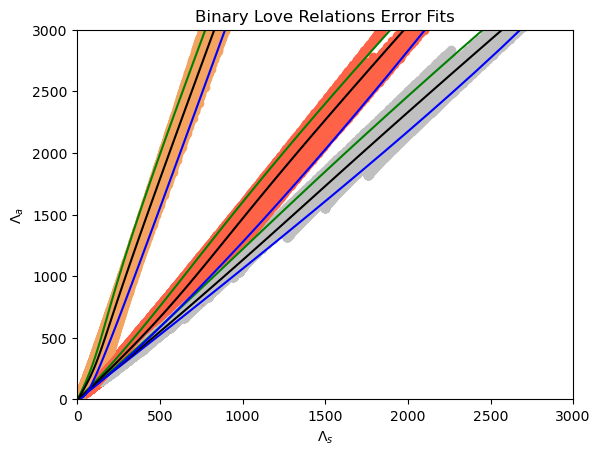

In [2]:
# ----------------------------------- Create Error Fits  ------------------------------- #
eos_directory = "sets_eos/"
eos_sets = listdir(eos_directory)

npts_ls = 500
npts_q = 500
lamba_grid = linspace(10, 5000, npts_ls)
# Two grid points 
q_grid = [0.65, 0.75] 

percent = 10

print("*"*20+"\t Gather and plot the error for each point of the Set\t"+"*"*20)
for sets in eos_sets:
  if sets == "nuclear":
    set_dir = eos_directory+sets+"/"
    # Read the parameter file
    file_param = set_dir+"fit_parameters_%s.dat"%sets
    print("Parameter of the fit file %s"%file_param)
    par_fit = loadtxt(file_param, usecols = (0), unpack=True)
    print("Parameters of the fit: ", par_fit)

    set_dir = eos_directory+sets+"/"

    file_min_max = "data_min_max_LALS_%s_pct%i.dat"%(sets,percent)
    #if file_min_max not in listdir():
    if True:
        print("The file for min and max data values does not exist.")
        # Reading the TOV files for the set of EoSs
        print("Read TOV tables in the set %s"%sets)
        if "tov_tables" in listdir(set_dir):
            tov_dir = set_dir+"tov_tables/"
            tov_list = listdir(tov_dir)
                        
            ##
            ipynb_checkpoints = ".ipynb_checkpoints" 
            while(ipynb_checkpoints in tov_list):
                tov_list.remove(ipynb_checkpoints)
            ##    
            
            table_la = zeros((npts_q,npts_ls,len(tov_list)),dtype=float)
            for i in range(len(tov_list)):
                # print("\t EoS %s"%(tov_list[i])) #Print out the list of EOSs 
                tov_file = tov_dir + tov_list[i]
                mass, lamba = fct.read_tov(tov_file, 0.5, None, "camk")
                for k in range(len(q_grid)):
                    lamba_sym, lamba_antisym = fct.extract_ls_la(mass, lamba, q_grid[k])
                    if len(lamba_sym) != 0 :
                        lsla = interpolate.interp1d(lamba_sym, lamba_antisym)
                        for j in range(len(lamba_grid)):
                            if lamba_grid[j] >= min(lamba_sym) and lamba_grid[j] <= max(lamba_sym):
                                table_la[k][j][i] = lsla(lamba_grid[j])
            table_la = fct.put_zero_values_to_mean(table_la)
            print("Create a two dimensional table for 90 percentile")
            fct.write_percentile_file(file_min_max, q_grid, lamba_grid, table_la, percent)

    print("Doing fit for minimum value...")
    # param_min, covar_min = curve_fit(fct.lals_fit, (all_ls_table,all_q_table), all_la_min, p0 = par_fit, method="trf", maxfev=20000) #Changed into 20000 if it still struggles    
    print("Doing fit for maximum value...")
    # param_max, covar_max = curve_fit(fct.lals_fit, (all_ls_table,all_q_table), all_la_max, p0 = par_fit, method="trf", maxfev=20000)
    
    #Print out param_mine to save for later 
    print("*"*10+ "Param_min values:" + "*"*10)

    param_min = [1.32402118, -42.8022509, 55.00946789, -19.94612875, 138.99695279,
                 -184.42921881, 64.97193015, -50.36609873, 43.03910145, -8.79025148,
                 -41.0416171, 47.70745751, -13.82700269, 126.3507737, -130.18833826,
                 20.37358684, -28.97010251, -54.30446461, 70.78194822]
    print(param_min)
    print("")
    print("*"*10+ "Param_max values:" + "*"*10)
    
    param_max = [ 1.25988254e+00, -1.15410909e+02,-1.52871336e+02,  3.73698381e+02,
                 1.20161238e+03, -1.00670286e+03, -6.39927118e+02, -5.25117047e+02,
                 -3.32098998e+02,  1.69203384e+03, -1.00108108e+02, -1.52676382e+02,
                 3.48902250e+02,  1.08496407e+03, -1.14306049e+03, -2.06933379e+02,
                 -3.21037227e+02,  3.27464879e+02,  1.50682180e+02]
    print(param_max)
    
    
    fit_lamba_antisym_min = fct.lals_fit((lamba_grid, q_grid[0]),
                                        param_min[0],                        #nn
                                        param_min[1], param_min[2], param_min[3],        #b1...
                                        param_min[4], param_min[5], param_min[6],        #b2...
                                        param_min[7], param_min[8], param_min[9],        #b3...
                                        param_min[10], param_min[11], param_min[12],     #c1...
                                        param_min[13], param_min[14], param_min[15],     #c2...
                                        param_min[16], param_min[17], param_min[18]      #c3...
                                        )

    fit_lamba_antisym_max = fct.lals_fit((lamba_grid, q_grid[0]),
                                        param_max[0],                        #nn
                                        param_max[1], param_max[2], param_max[3],        #b1...
                                        param_max[4], param_max[5], param_max[6],        #b2...
                                        param_max[7], param_max[8], param_max[9],        #b3...
                                        param_max[10], param_max[11], param_max[12],     #c1...
                                        param_max[13], param_max[14], param_max[15],     #c2...
                                        param_max[16], param_max[17], param_max[18]      #c3...
                                        )
    

print("*"*20+"\t Graphing the fits containing 90% of Lambda_A and Lambda_S values \t"+"*"*20)
# ----------------------------------- Create Error Fits  ------------------------------- #

q_grid = [0.65,0.75,0.90] #linspace(0.5,1.0, npts_q) #TODO discuss with Carl the limits of the q values
#[0.65,0.75,0.85]
ls_inter = 10**linspace(1,4,100) 
color_forq = ["silver", "tomato", "sandybrown", "orange","brown", "yellow", "red", "teal", "gray"]

for sets in eos_sets:
    set_dir = eos_directory+sets+"/"
    file_param = set_dir+"fit_parameters_%s.dat"%sets
    par = loadtxt(file_param, usecols = (0), unpack=True)
    
    # Reading the TOV files for the set of EoSs
    if "tov_tables" in listdir(set_dir):
        tov_dir = set_dir+"tov_tables/"
        tov_list = listdir(tov_dir)
        
        ### Uncomment if you are using this in Jupyter Notebook 
        ipynb_checkpoints = ".ipynb_checkpoints" 
        while(ipynb_checkpoints in tov_list):
            tov_list.remove(ipynb_checkpoints)
        ##
        
        all_q = [] ; all_ls = [] ; all_la = []
        for i in range(len(tov_list)):
            tov_file = tov_dir + tov_list[i]
            mass, lamba = fct.read_tov(tov_file, 0.5, None, "camk")
            for q in range(len(q_grid)):
                lamba_sym, lamba_antisym = fct.extract_ls_la(mass, lamba, q_grid[q])
                plt.scatter(lamba_antisym, lamba_sym, color=color_forq[q] )
                

########                
for q in q_grid:
    la_fit_min = fct.lals_fit((ls_inter, q), param_min[0],param_min[1],param_min[2],param_min[3],param_min[4],param_min[5],param_min[6],
                                   param_min[7],param_min[8],param_min[9],param_min[10],param_min[11],param_min[12],param_min[13],param_min[14],
                                   param_min[15],param_min[16],param_min[17],param_min[18])
    plt.plot(la_fit_min, ls_inter, color = 'green', label = "upper bound")#,linewidth=3)
    
    la_fit_max = fct.lals_fit((ls_inter, q), param_max[0],param_max[1],param_max[2],param_max[3],param_max[4],param_max[5],param_max[6],
                                   param_max[7],param_max[8],param_max[9],param_max[10],param_max[11],param_max[12],param_max[13],param_max[14],
                                   param_max[15],param_max[16],param_max[17],param_max[18])
    plt.plot(la_fit_max, ls_inter, color = 'blue', label = "lower bound")#,linewidth=3)
    
    la_fit = fct.lals_fit((ls_inter, q), par[0],par[1],par[2],par[3],par[4],par[5],par[6],
                           par[7],par[8],par[9],par[10],par[11],par[12],par[13],par[14],par[15],
                           par[16],par[17],par[18])     
    plt.plot(la_fit, ls_inter, color = 'black', label = "Model Fit")#,linewidth=3)



plt.title("Binary Love Relations Error Fits")
plt.xlabel(r'$\Lambda_s$')
plt.ylabel(r'$\Lambda_a$')

plt.xlim([0,3000])
plt.ylim([0,3000])
# plt.legend()

# #Zoomed in on q = 0.90
# plt.xlim([100,220])
# plt.ylim([350,500])
# myHandle = [Line2D([], [], color='black', lw = 3),Line2D([], [], color='blue', lw = 3), Line2D([], [], color='green', lw = 3), Line2D([], [], color='peru', lw = 3)]
# plt.legend(handles = myHandle, labels=['Fits','Lower Bound', 'Upper Bound','q=0.90'], frameon = False)

In [3]:
print(eos_sets)

['nuclear']
